# Using Afinn Lexicon

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
both = pd.read_csv('Both.csv',encoding='latin1', names = ['username','datetime','tweet','from'])
both
#clintons['tweet'].to_csv('Clintons_tweets.csv')
#!pip install afinn
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(tweet) for tweet in both['tweet']]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [10]:
# sentiment statistics per news category
df = pd.DataFrame([list(both['tweet']), sentiment_scores, sentiment_category, list(both['from'])]).T
df.columns = ['tweet', 'sentiment_score', 'sentiment_category','from']
#df['sentiment_score'] = df.sentiment_score.astype('float')
#df.groupby(by=['tweet']).describe()
df.groupby(by=['from']).describe()

tweet                                                             \
          count  unique                                                top   
from                                                                         
Hillary   81789   81789  I remember being invited to the Whitehouse and...   
Trump    197428  142633                             Forecast: Fine weather   

              sentiment_score                      sentiment_category         \
         freq           count unique  top     freq              count unique   
from                                                                           
Hillary     1         81789.0   34.0  0.0  44782.0              81789      3   
Trump    6500        197428.0   48.0  0.0  82910.0             197428      3   

                         
             top   freq  
from                     
Hillary  neutral  44782  
Trump    neutral  82910

In [11]:
df['sentiment_category'].value_counts()

neutral     127692
negative     77881
positive     73644
Name: sentiment_category, dtype: int64

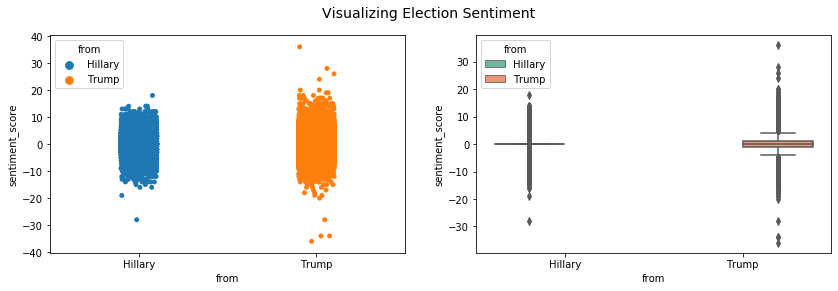

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='from', y="sentiment_score", 
                   hue='from', data=df, ax=ax1)
bp = sns.boxplot(x='from', y="sentiment_score", 
                 hue='from', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing Election Sentiment', fontsize=14)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


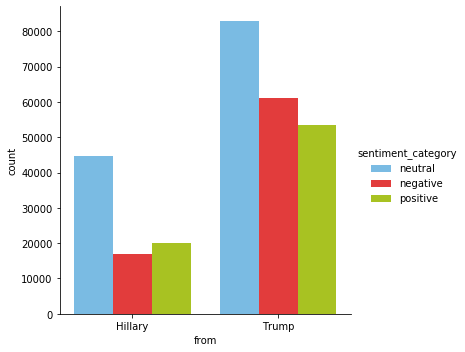

In [14]:
fc = sns.factorplot(x="from", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})